# Projeto DSA

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# carregando o dataset

vendas_df = pd.read_csv('dataset.csv', sep =',')
vendas_df.shape

(9700, 11)

In [5]:
# amostra dos dados

vendas_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# amostra dos dados

vendas_df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# colunas do conjunto de dados

vendas_df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# verificando o tipo de dado de cada coluna

vendas_df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [12]:
# resumo estatístico da coluna com o valor de venda

# vendas_df['Valor_Venda'].describe()
vendas_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Valor_Venda,9700.0,230.469892,627.504252,0.444,17.248,54.272,209.9325,22638.48


In [13]:
# verificando se há registros duplicados

vendas_df[ vendas_df.duplicated() ]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [14]:
# Verificando de há valores ausentes

vendas_df.isnull().any().any()
# vendas_df.isnull().any()
# vendas_df.isnull().sum()

False

## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [63]:
# vendas_os_df = vendas_df.query('Categoria == "Office Supplies"')
vendas_os_df = vendas_df[ vendas_df.Categoria == 'Office Supplies' ]

In [88]:
# vendas_os_df.groupby('Cidade').agg('sum')['Valor_Venda'] 
cidades_df = vendas_os_df.groupby('Cidade')['Valor_Venda'].sum() # série cujo índice é a coluna cidades

In [89]:
cidade_maior_venda_df = cidades_df.idxmax() # idxmax ao invés de max, pois queremos o índice
print("Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda_df)

Cidade com maior valor de venda para 'Office Supplies': New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [158]:
data_vendas_df = vendas_df.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index() 
data_vendas_df.head()
# obs.: precisa .reset_index() pro gráfico, caso contrário o índice ficam sendo as datas

,Data_Pedido,Valor_Venda
0,01/01/2018,1481.8280
1,01/02/2015,468.9000
2,01/02/2017,161.9700
3,01/03/2015,2203.1510
4,01/03/2016,1642.1744


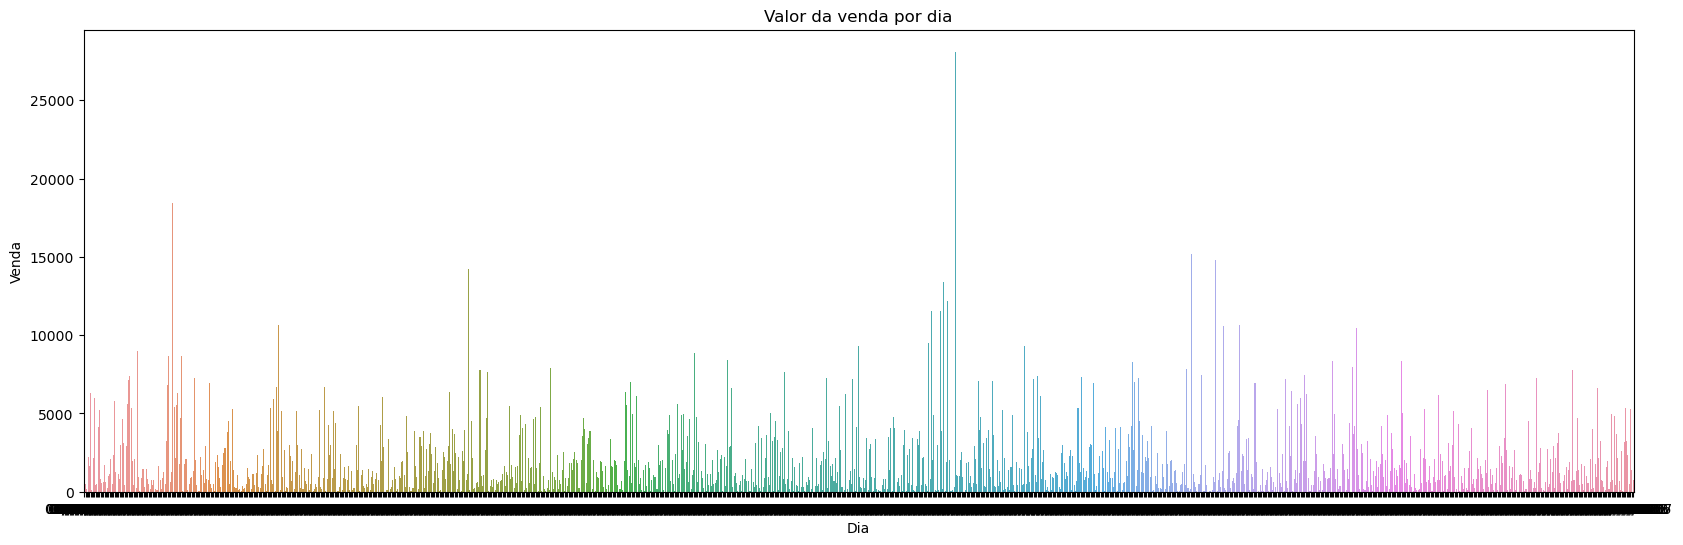

In [166]:
plt.figure(figsize = (20, 6))
grafico = sns.barplot(data=data_vendas_df, x='Data_Pedido', y='Valor_Venda', ci=None)
grafico.set(title='Valor da venda por dia', xlabel='Dia', ylabel='Venda'); # melhor mensal ou anual
plt.show()

#plt.figure(figsize = (20, 6))
#data_vendas_df.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green') # plot.bar seria gráfico de barras
#plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [156]:
estados_df = vendas_df.groupby('Estado')['Valor_Venda'].sum().reset_index()
estados_df.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


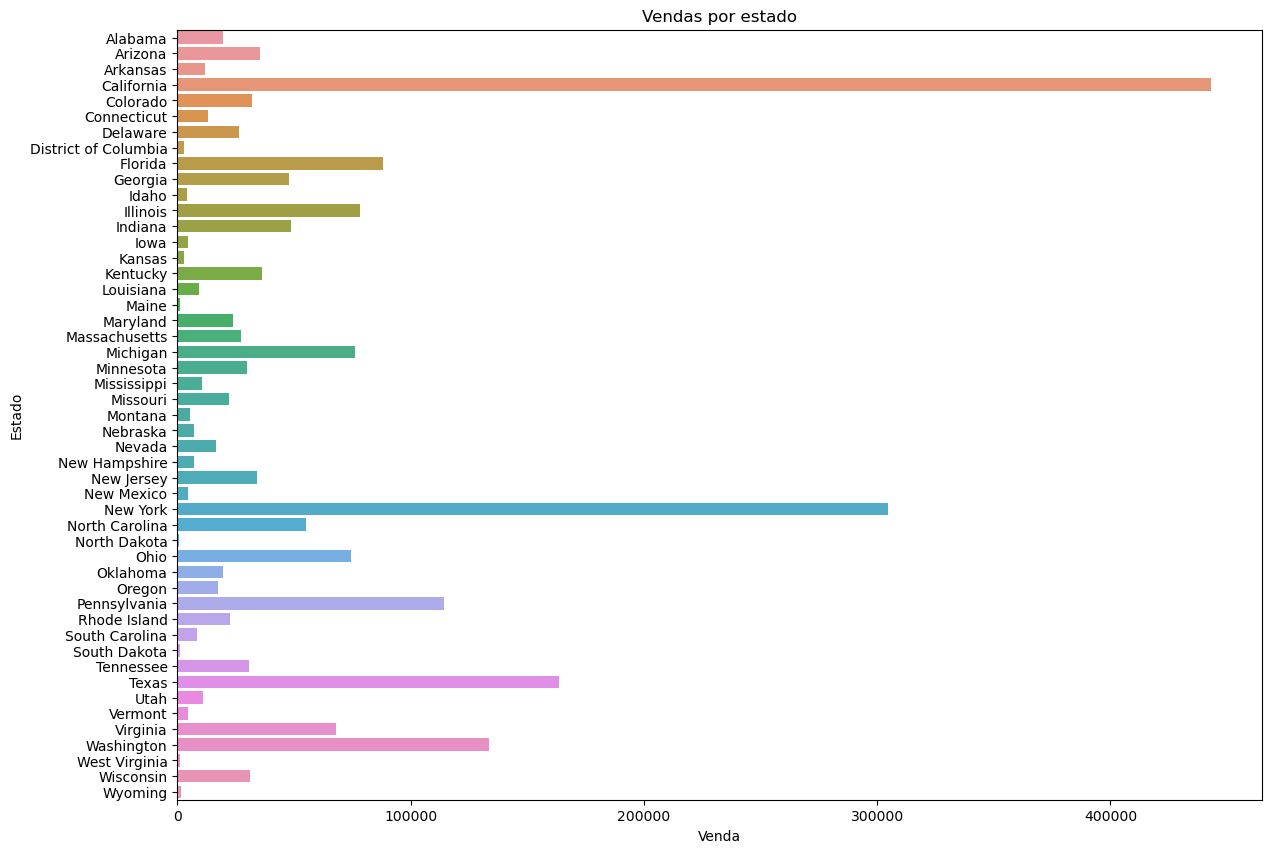

In [192]:
plt.figure(figsize = (14, 10))
grafico = sns.barplot(data = estados_df, x = 'Valor_Venda', y = 'Estado')
grafico.set(title = 'Vendas por estado',  ylabel='Estado', xlabel='Venda')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [179]:
cidades_df = vendas_df.groupby('Cidade')['Valor_Venda'].sum()
cidades_ordenadas_df = cidades_df.sort_values(ascending=False)
top10_cidades_df = cidades_ordenadas_df.head(n=10).reset_index()

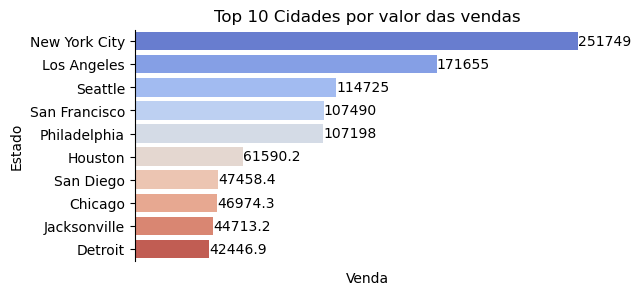

In [190]:
plt.figure(figsize = (6, 3))
grafico = sns.barplot(data = top10_cidades_df, x = 'Valor_Venda', y = 'Cidade', palette= 'coolwarm')
grafico.set(title = 'Top 10 Cidades por valor das vendas',  ylabel='Estado', xlabel='Venda', xticks=[])
grafico.bar_label(grafico.containers[0], fontsize=10, color='black')
grafico.spines[['top', 'bottom', 'right']].set_visible(False)
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [195]:
segmentos_df = vendas_df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
segmentos_df["Segmentos_percent"] = 100 * segmentos_df["Valor_Venda"] / segmentos_df["Valor_Venda"].sum()
segmentos_df

,Segmento,Valor_Venda,Segmentos_percent
0,Consumer,1.133834e+06,50.718181
1,Corporate,6.792322e+05,30.383117
2,Home Office,4.224914e+05,18.898702


In [ ]:
# função para converter os dados de notação científiva em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

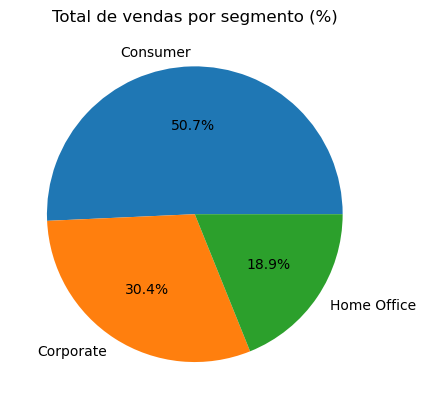

In [196]:
grafico = segmentos_df.plot.pie(y="Segmentos_percent", labels=segmentos_df['Segmento'], autopct='%1.1f%%', legend=False);
grafico.set(ylabel='', title='Total de vendas por segmento (%)');

<Figure size 1000x900 with 0 Axes>

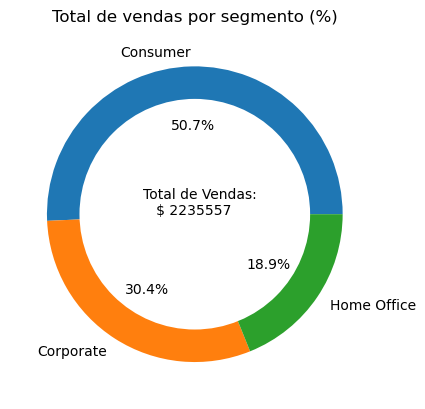

In [234]:
plt.figure(figsize = (10, 9))
grafico = segmentos_df.plot.pie(y="Segmentos_percent", labels=segmentos_df['Segmento'], autopct='%1.1f%%', legend=False)
grafico.set(ylabel='', title='Total de vendas por segmento (%)')

centre_circle = plt.Circle((0, 0), 0.78, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text = f'Total de Vendas:\n   $ {int(sum(segmentos_df["Valor_Venda"]))}', xy = (-0.35,0))
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [5]:
# convertendo a coluna para o tipo datetime

vendas_df['Data_Pedido'] = pd.to_datetime(vendas_df['Data_Pedido'], dayfirst = True)
vendas_df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [6]:
# criando a coluna Ano

vendas_df['Ano'] = vendas_df['Data_Pedido'].dt.year
vendas_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [239]:
ano_e_segmento_df = vendas_df.groupby(['Ano','Segmento'])['Valor_Venda'].sum().reset_index()
ano_e_segmento_df

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [7]:
# vendas_df['Valor_Venda'][ vendas_df['Valor_Venda'] > 1000 ].count()

vendas_df['Desconto'] = np.where(vendas_df['Valor_Venda'] > 1000, 0.15, 0.10) # criando a coluna com descontos
vendas_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [249]:
# sum(vendas_df.Desconto == 0.15)
vendas_df['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [8]:
vendas_df['Valor_Venda_com_Desconto'] = vendas_df['Valor_Venda'] - vendas_df['Valor_Venda']*vendas_df['Desconto']
vendas_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_com_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [267]:
'''
vendas15_df = vendas_df.query('Desconto == 0.15')
media_antes = vendas15_df['Valor_Venda'].mean()
media_depois = vendas15_df['Valor_Venda_com_Desconto'].mean()
'''

media_antes = vendas_df['Valor_Venda'][vendas_df['Desconto'] == 0.15].mean()
media_depois = vendas_df['Valor_Venda_com_Desconto'][vendas_df['Desconto'] == 0.15].mean()

In [270]:
print(f'Média das vendas antes do desconto de 15%: {round(media_antes, 2)}')

Média das vendas antes do desconto de 15%: 2116.81


In [272]:
print(f'Média das vendas depois do desconto de 15%: {round(media_depois, 2)}')

Média das vendas depois do desconto de 15%: 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [9]:
vendas_df['Mes'] = vendas_df['Data_Pedido'].dt.month
vendas_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_com_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [10]:
# agrupando por ano, mês e segmento e calculando estatísticas de agregação

ano_mes_segmento_df = vendas_df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
ano_mes_segmento_df

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

<Figure size 1200x600 with 0 Axes>

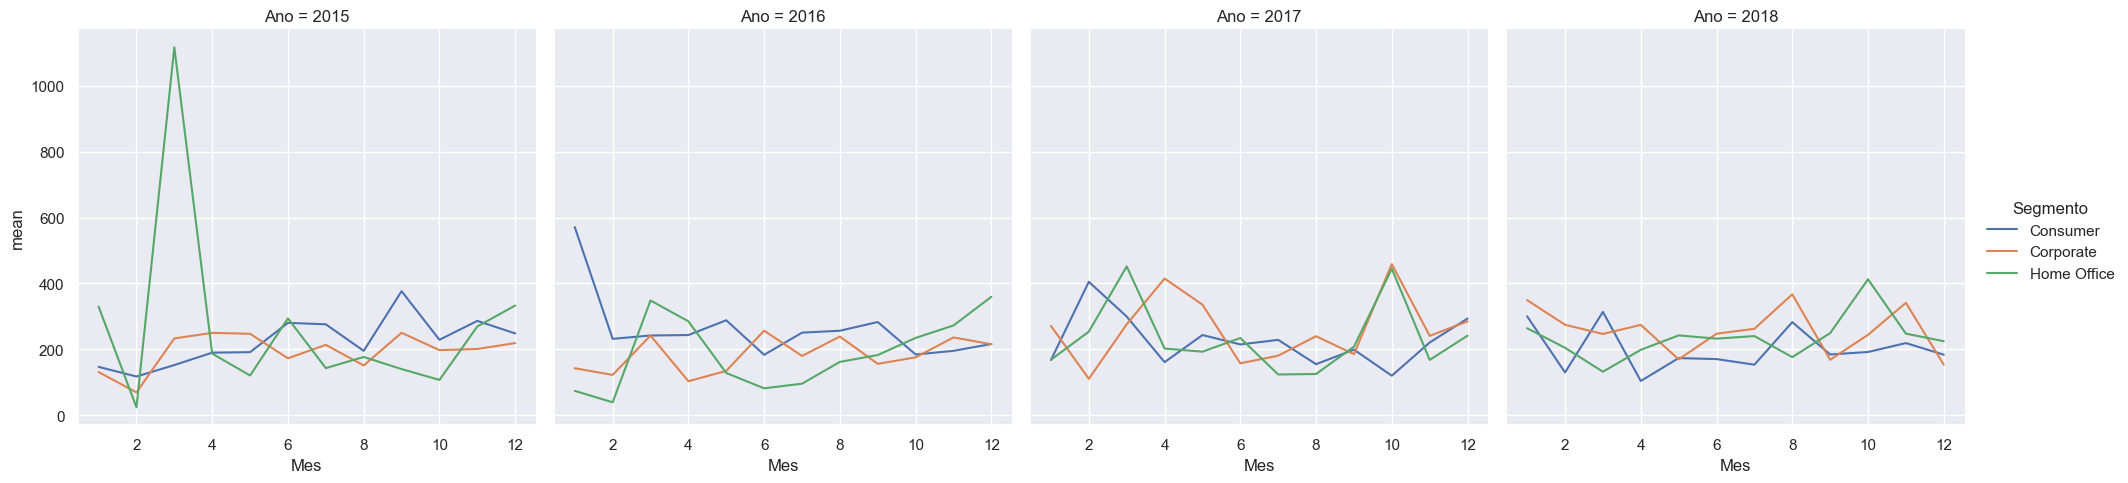

In [25]:
anos = ano_mes_segmento_df.index.get_level_values(0)
meses = ano_mes_segmento_df.index.get_level_values(1)
segmentos = ano_mes_segmento_df.index.get_level_values(2)

plt.figure(figsize = (12, 6))
grafico = sns.relplot(kind = 'line', data = ano_mes_segmento_df, y = 'mean', x = meses, hue = segmentos, col = anos, col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [34]:
cat_e_sub_df = vendas_df.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].agg('sum').reset_index()
top12_cat_e_sub_df = cat_e_sub_df.sort_values(by='Valor_Venda', ascending = False).head(n=12)
top12_cat_e_sub_df

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
11,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
6,Office Supplies,Binders,194723.3810
15,Technology,Machines,189238.6310
13,Technology,Accessories,162791.3620
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,108045.0467
4,Office Supplies,Appliances,104061.6930


In [35]:
# convertendo valor_venda para inteiro

top12_cat_e_sub_df = top12_cat_e_sub_df.astype({'Valor_Venda': int})
top12_cat_e_sub_df

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271
1,Furniture,Chairs,317919
11,Office Supplies,Storage,216188
3,Furniture,Tables,202083
6,Office Supplies,Binders,194723
15,Technology,Machines,189238
13,Technology,Accessories,162791
14,Technology,Copiers,146248
0,Furniture,Bookcases,108045
4,Office Supplies,Appliances,104061


In [37]:
# agrupando por categoria

cat_df = top12_cat_e_sub_df.groupby('Categoria')['Valor_Venda'].sum().reset_index()
cat_df

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [38]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

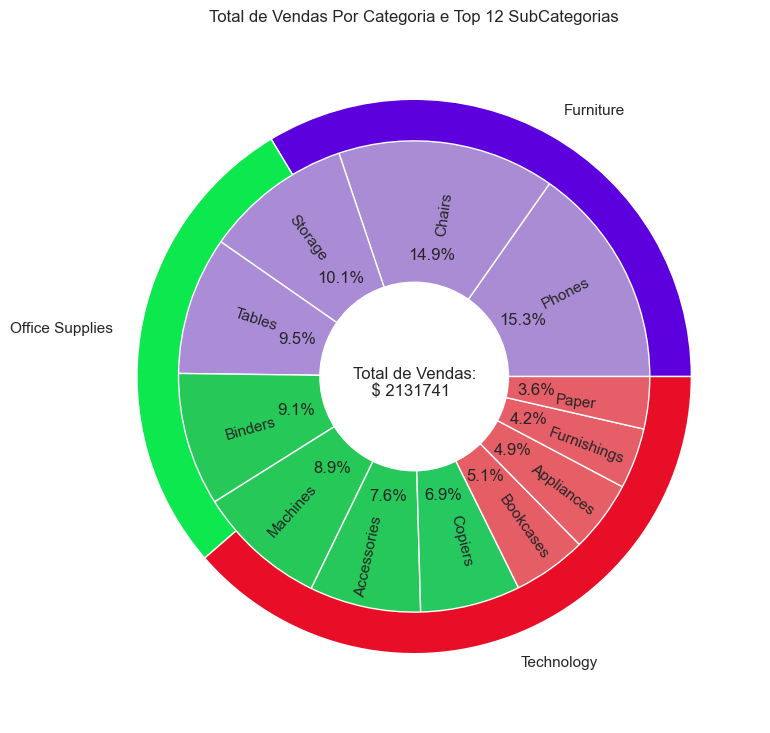

In [80]:
fig, ax = plt.subplots(figsize = (15,9))

grafico1 = ax.pie(cat_df['Valor_Venda'], radius = 1, labels = cat_df['Categoria'], wedgeprops = dict(edgecolor = 'white'), colors = cores_categorias)

grafico2 = ax.pie(top12_cat_e_sub_df['Valor_Venda'], radius = 0.85, labels = top12_cat_e_sub_df['SubCategoria'], autopct = '%1.1f%%',
                  colors = cores_subcategorias, labeldistance = 0.6, wedgeprops = dict(edgecolor = 'white'), pctdistance = 0.52, rotatelabels = True)

centre_circle = plt.Circle((0, 0), 0.34, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text = f'Total de Vendas:\n    $ {int(sum(top12_cat_e_sub_df["Valor_Venda"]))}', xy = (-0.22, -0.07))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')

plt.show()